In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
gdf = gpd.read_file("./scr/data/AAA.geojson")
print(gdf.columns)

Index(['id', 'name', 'way_type', 'index', 'index_10', 'stress_level', 'offset',
       'side', 'proc_width', 'proc_surface', 'proc_smoothness', 'proc_oneway',
       'proc_sidepath', 'proc_highway', 'proc_maxspeed',
       'proc_traffic_mode_left', 'proc_traffic_mode_right',
       'proc_separation_left', 'proc_separation_right', 'proc_buffer_left',
       'proc_buffer_right', 'proc_mandatory', 'proc_traffic_sign', 'fac_width',
       'fac_surface', 'fac_highway', 'fac_maxspeed', 'base_index', 'fac_1',
       'fac_2', 'fac_3', 'fac_4', 'data_bonus', 'data_malus',
       'data_incompleteness', 'data_missing', 'data_missing_width',
       'data_missing_surface', 'data_missing_smoothness',
       'data_missing_maxspeed', 'data_missing_parking', 'data_missing_lit',
       'filter_usable', 'filter_way_type', 'layer', 'path', 'geometry'],
      dtype='object')


In [3]:
# copy一份
gdf_copy = gdf

In [4]:
# 选取需要的字段并去掉缺失值
cols = ['stress_level', 'base_index','fac_1', 'fac_2', 'fac_3', 'fac_4', 'index_10']
df = gdf[cols].dropna()

        stress_level  base_index  fac_1  fac_2  fac_3  fac_4  index_10
0                  4          60   0.71   0.85    1.0    1.0         3
1                  4          60   0.71   1.00    1.0    1.0         4
2                  4          60   0.91   0.85    1.0    1.0         4
3                  1          90   0.74   0.97    1.0    1.0         6
4                  4          60   0.71   1.00    1.0    1.0         4
...              ...         ...    ...    ...    ...    ...       ...
278167             3          70   0.74   1.00    1.0    1.0         5
278168             3          70   0.74   0.90    1.0    1.0         4
278169             3          70   0.84   0.55    1.0    1.0         3
278170             3          70   0.74   0.55    1.0    1.0         2
278171             3          70   0.84   0.55    1.0    1.0         3

[278172 rows x 7 columns]
        stress_level     base_index          fac_1          fac_2     fac_3  \
count  278172.000000  278172.000000  27817

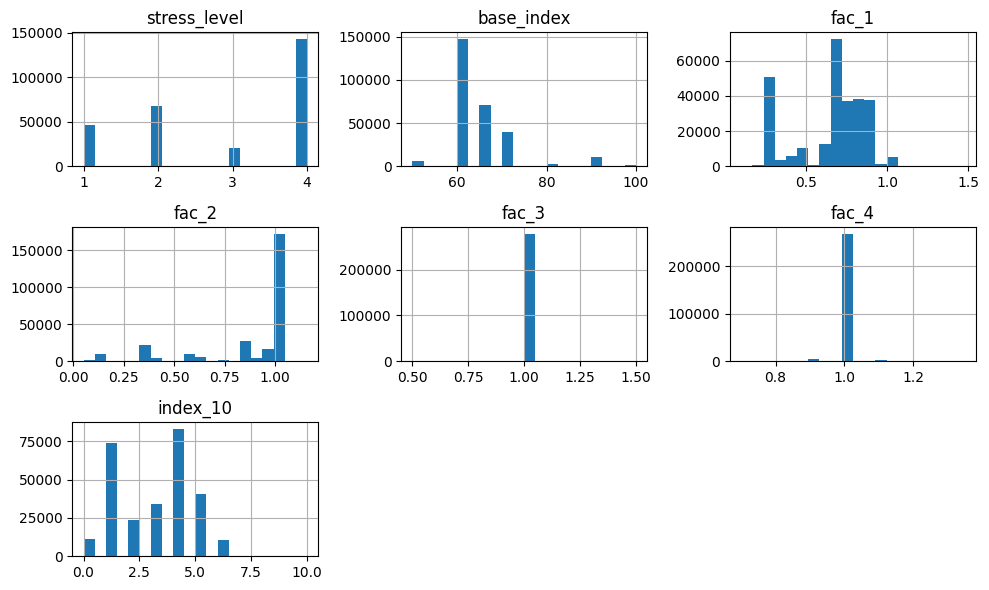

In [5]:
print(df)
print(df.describe())
print(df['stress_level'].value_counts())

import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# df.plot(kind='density', subplots=True, layout=(3, 2), figsize=(10, 8), sharex=False)
# plt.tight_layout()
# plt.show()

In [6]:
def calculate_vif(X):
    """手动计算方差膨胀因子（VIF）"""
    vif_list = []
    for i in range(X.shape[1]):
        y = X[:, i]
        X_other = np.delete(X, i, axis=1)
        # R^2 = 1 - (残差平方和 / 总平方和)
        beta, _, _, _ = np.linalg.lstsq(X_other, y, rcond=None)
        y_pred = X_other @ beta
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot
        vif = 1 / (1 - r2)
        vif_list.append(vif)
    return vif_list

vif_values = calculate_vif(df.values)

# 输出结果
vif_df = pd.DataFrame({
    "feature": df.columns,
    "VIF": vif_values
})
print(vif_df)

        feature        VIF
0  stress_level   2.029031
1    base_index   4.633121
2         fac_1  27.726363
3         fac_2  22.359992
4         fac_3   0.000000
5         fac_4   1.210314
6      index_10  34.869485


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27524\226084261.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  r2 = 1 - ss_res / ss_tot


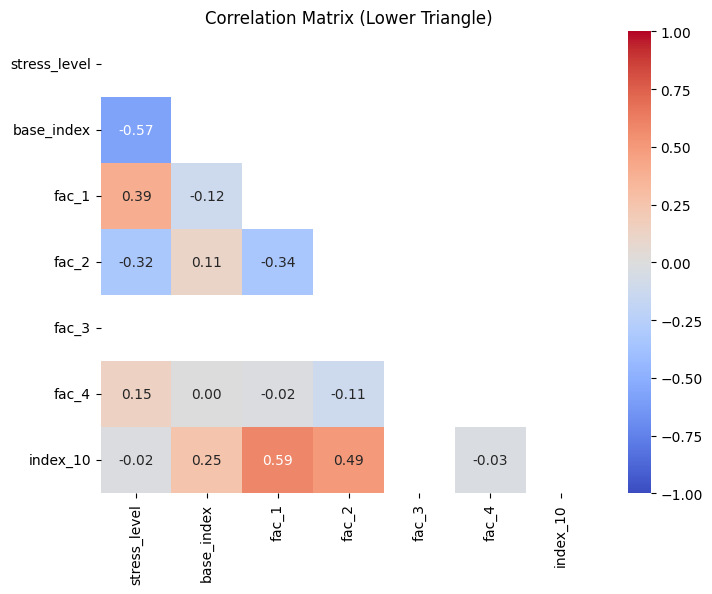

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
gdf = gpd.read_file("./scr/data/AAA.geojson")

# 选取要分析的列
cols = ['stress_level', 'base_index', 'fac_1', 'fac_2', 'fac_3', 'fac_4', 'index_10']
df = gdf[cols].dropna()

# 计算相关系数矩阵
corr = df.corr(method='pearson')

# 生成下三角 mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27524\2173060121.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  r2 = 1 - ss_res / ss_tot


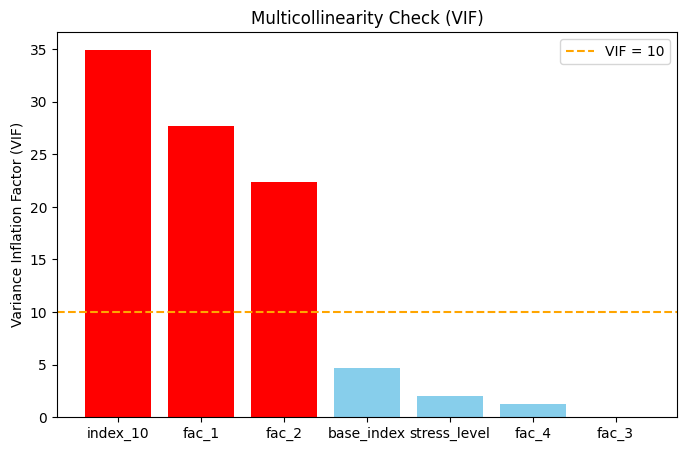

        feature        VIF
6      index_10  34.869485
2         fac_1  27.726363
3         fac_2  22.359992
1    base_index   4.633121
0  stress_level   2.029031
5         fac_4   1.210314
4         fac_3   0.000000


In [8]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
gdf = gpd.read_file("./scr/data/AAA.geojson")

# 选择变量
cols = ['stress_level', 'base_index', 'fac_1', 'fac_2', 'fac_3', 'fac_4', 'index_10']
df = gdf[cols].dropna()

# 手动计算 VIF
def calculate_vif(X):
    vif_list = []
    for i in range(X.shape[1]):
        y = X[:, i]
        X_other = np.delete(X, i, axis=1)
        beta, _, _, _ = np.linalg.lstsq(X_other, y, rcond=None)
        y_pred = X_other @ beta
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - ss_res / ss_tot
        vif = 1 / (1 - r2) if r2 != 1 else np.inf
        vif_list.append(vif)
    return vif_list

vif_values = calculate_vif(df.values)

# 转成 DataFrame
vif_df = pd.DataFrame({
    "feature": df.columns,
    "VIF": vif_values
}).sort_values("VIF", ascending=False)

# 画图
plt.figure(figsize=(8, 5))
colors = ['red' if v > 10 else 'skyblue' for v in vif_df["VIF"]]
plt.bar(vif_df["feature"], vif_df["VIF"], color=colors)
plt.axhline(y=10, color='orange', linestyle='--', label='VIF = 10')
plt.ylabel("Variance Inflation Factor (VIF)")
plt.title("Multicollinearity Check (VIF)")
plt.legend()
plt.show()

print(vif_df)


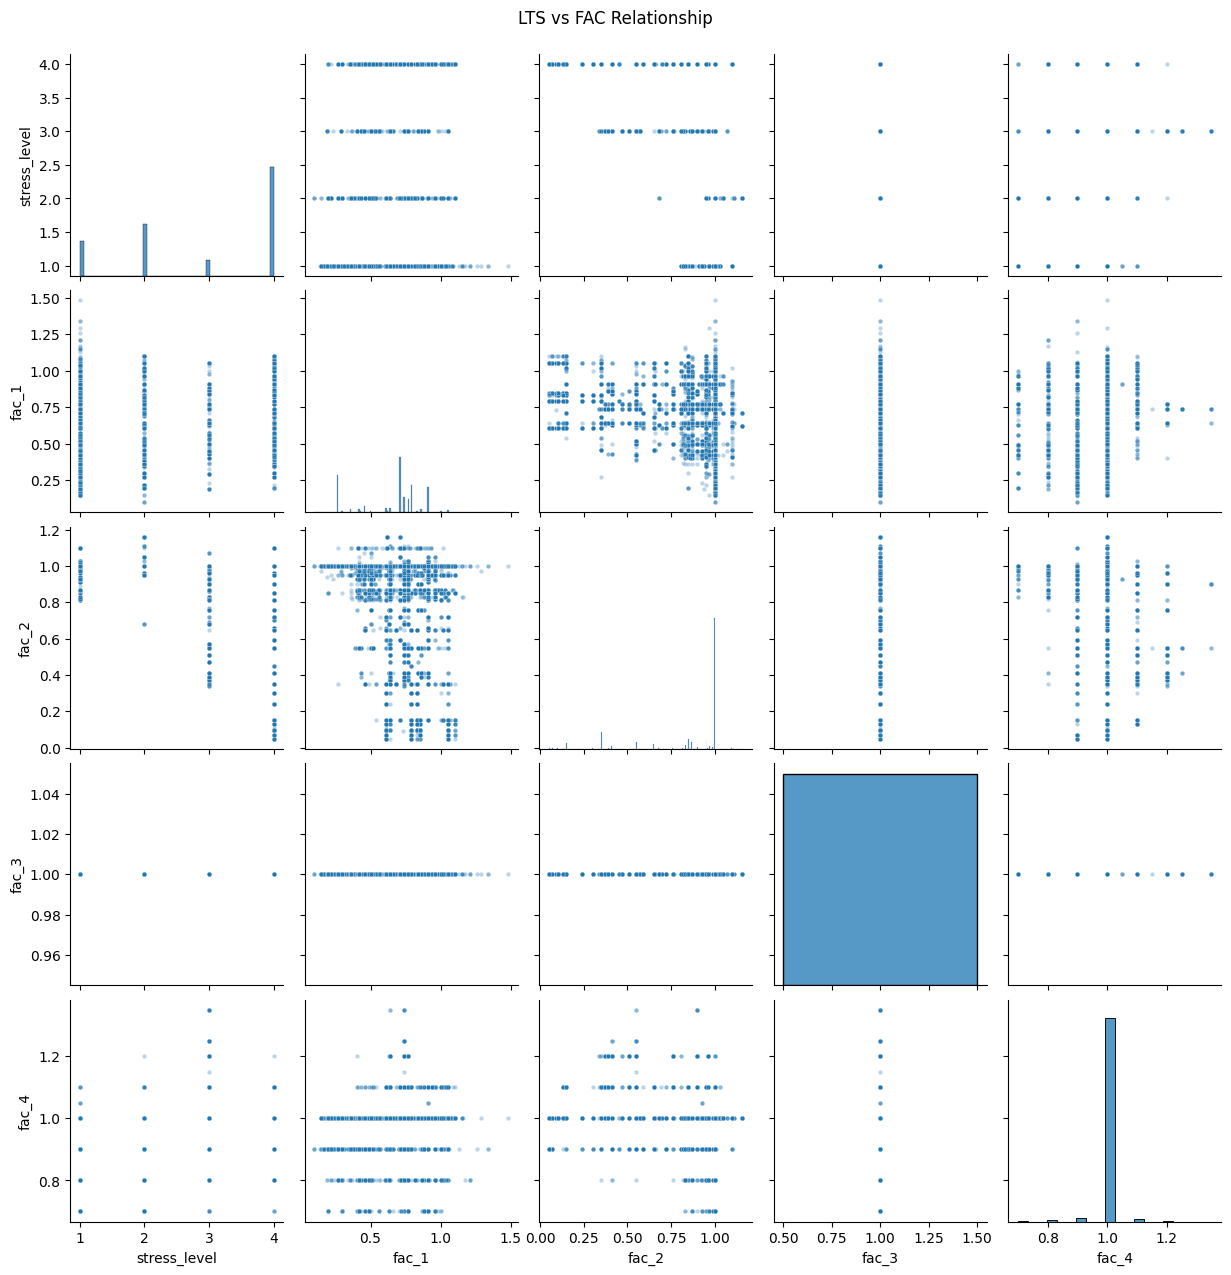

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
gdf = gpd.read_file("./scr/data/AAA.geojson")

# 选取需要对比的列
cols = ['stress_level', 'fac_1', 'fac_2', 'fac_3', 'fac_4']
df = gdf[cols].dropna()

# 画 pairplot（散点图 + 直方图 + 相关系数）
sns.pairplot(df, kind="scatter", diag_kind="hist", plot_kws={'alpha':0.3, 's':10})
plt.suptitle("LTS vs FAC Relationship", y=1.02)
plt.show()


=== Explained Variance Ratio ===
    PC  ExplainedVar  ExplainedVarRatio
0  PC1        1.7325             0.4331
1  PC2        1.0128             0.2532
2  PC3        0.6870             0.1718
3  PC4        0.5676             0.1419

=== Loadings (variable contributions) ===
                PC1    PC2    PC3    PC4
stress_level  0.771  0.040 -0.429  0.469
fac_1         0.744 -0.348 -0.198 -0.535
fac_2        -0.724  0.005 -0.679 -0.124
fac_4         0.246  0.944 -0.051 -0.216


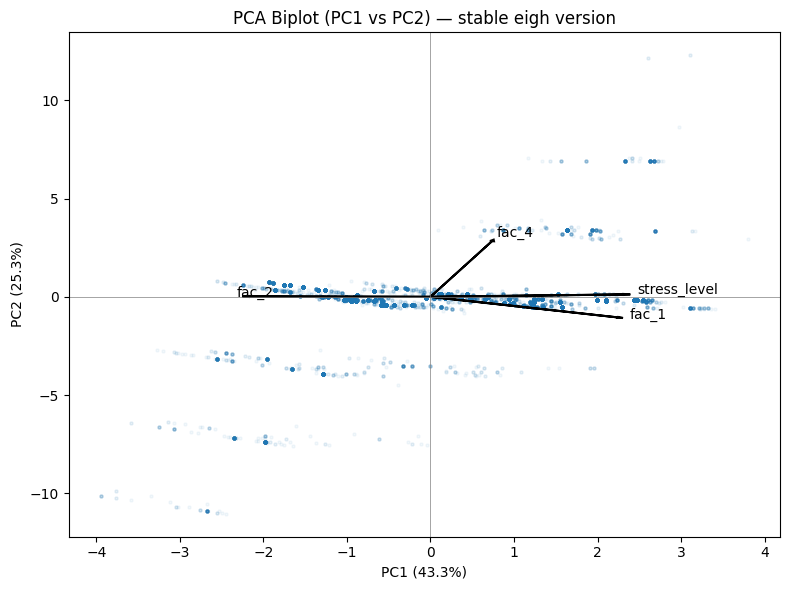

In [11]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 & 取列
gdf = gpd.read_file("./scr/data/AAA.geojson")
cols = ['stress_level', 'fac_1', 'fac_2', 'fac_3', 'fac_4']
df = gdf[cols].astype(float).replace([np.inf, -np.inf], np.nan).dropna()

# 1) 剔除常数列（方差为0的列）
stds = df.std(ddof=1)
keep_cols = stds[stds > 0].index.tolist()
X = df[keep_cols].values
features = np.array(keep_cols)

# 2) 标准化
X_mean = X.mean(axis=0, keepdims=True)
X_std  = X.std(axis=0, ddof=1, keepdims=True)
Z = (X - X_mean) / X_std

# 3) 用协方差矩阵做 PCA（更稳）
#    C 是对称正定矩阵，eigh 比 svd 更不容易数值崩
C = np.cov(Z, rowvar=False)                # 形状 = (p, p)
evals, evecs = np.linalg.eigh(C)           # 特征值升序
# 翻转为降序
idx = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:, idx]

# 解释方差与占比
explained_variance = evals
explained_variance_ratio = evals / evals.sum()

# 载荷（变量对各主成分的贡献，等价于特征向量 * sqrt(特征值)）
loadings = evecs * np.sqrt(evals)

# 输出表
evr_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    "ExplainedVar": explained_variance,
    "ExplainedVarRatio": explained_variance_ratio
})
loadings_df = pd.DataFrame(loadings, index=features, columns=[f"PC{i+1}" for i in range(loadings.shape[1])])

print("=== Explained Variance Ratio ===")
print(evr_df.round(4))
print("\n=== Loadings (variable contributions) ===")
print(loadings_df.round(3))

# 4) 画 Biplot（PC1 vs PC2）
pc1, pc2 = 0, 1
# 样本在主成分上的得分：Z @ evecs
scores = Z @ evecs[:, [pc1, pc2]]

plt.figure(figsize=(8, 6))
# 大数据可随机抽样以提速&防止过密
n = scores.shape[0]
sel = np.random.choice(n, size=min(n, 40000), replace=False)
plt.scatter(scores[sel,0], scores[sel,1], alpha=0.05, s=5)

scale = 3.0
for i, var in enumerate(features):
    x = loadings[i, pc1] * scale
    y = loadings[i, pc2] * scale
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.08, linewidth=1.5)
    plt.text(x*1.07, y*1.07, var, fontsize=10)

plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel(f"PC1 ({explained_variance_ratio[pc1]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_variance_ratio[pc2]*100:.1f}%)")
plt.title("PCA Biplot (PC1 vs PC2) — stable eigh version")
plt.tight_layout()
plt.show()
